## Load data

In [1]:
import keras
import numpy as np
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.callbacks import TensorBoard
import pandas as pd
from sklearn.utils import shuffle
from seaborn import heatmap
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./shots1.csv')
for name in data.columns:
    if 'Unnamed' in name:
        del data[name]
print(data.columns)

Index(['AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS'],
      dtype='object')


In [3]:
print(len(data))
data = data.dropna(axis=0, how='any')
print(len(data))

434
434


## Normalize & visualize data

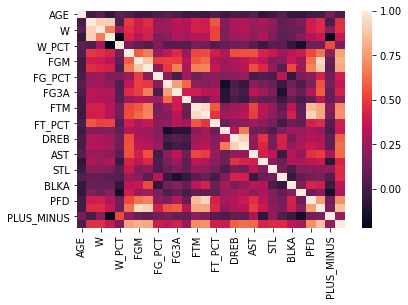

In [4]:
for col_name in data.columns:
    if '_PCT' in col_name:
        data[col_name] /= 1.
    else:
        a = data[col_name]
        a = a - a.min()
        a = a / a.max()
        data[col_name] = a

data.head()
heatmap(data.corr())

## Divide data into train/test

In [5]:
def get(df, predict_col_name):
    Y = df[predict_col_name]
    X = df.loc[:, df.columns != predict_col_name]
    return X.as_matrix(), Y.as_matrix()


data = shuffle(data)
train_percentage = 0.8
l = int(len(data) * train_percentage)
train_data = data.iloc[: l, :]
test_data = data.iloc[l :, :]

dependent_variable = 'NBA_FANTASY_PTS'
train_x, train_y = get(train_data, dependent_variable)
test_x, test_y = get(test_data, dependent_variable)

print('train input shape:', train_x.shape)
print('test  input shape:', test_x.shape)

train input shape: (347, 27)
test  input shape: (87, 27)


In [ ]:
train_x.shape

## Training

In [6]:
net_input = Input(shape=(train_x.shape[1],))
x = Dense(64, activation='sigmoid')(net_input)
x = Dense(32, activation='tanh')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=net_input, outputs=out)
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 27)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1792      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(train_x, 
          train_y, 
          batch_size=256, 
          epochs=500, 
          validation_data=(test_x, test_y), 
          callbacks=[TensorBoard(log_dir='./train_logs/')])

Train on 347 samples, validate on 87 samples
Epoch 1/500
347/347 [==============================] - 0s - loss: 0.1028 - val_loss: 0.0636
Epoch 2/500
347/347 [==============================] - 0s - loss: 0.0566 - val_loss: 0.0368
Epoch 3/500
347/347 [==============================] - 0s - loss: 0.0324 - val_loss: 0.0263
Epoch 4/500
347/347 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0241
Epoch 5/500
347/347 [==============================] - 0s - loss: 0.0223 - val_loss: 0.0249
Epoch 6/500
347/347 [==============================] - 0s - loss: 0.0236 - val_loss: 0.0263
Epoch 7/500
347/347 [==============================] - 0s - loss: 0.0251 - val_loss: 0.0275
Epoch 8/500
347/347 [==============================] - 0s - loss: 0.0264 - val_loss: 0.0283
Epoch 9/500
347/347 [==============================] - 0s - loss: 0.0271 - val_loss: 0.0286
Epoch 10/500
347/347 [==============================] - 0s - loss: 0.0273 - val_loss: 0.0284
Epoch 11/500
347/347 [============

347/347 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0044
Epoch 89/500
347/347 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0043
Epoch 90/500
347/347 [==============================] - 0s - loss: 0.0042 - val_loss: 0.0042
Epoch 91/500
347/347 [==============================] - 0s - loss: 0.0041 - val_loss: 0.0041
Epoch 92/500
347/347 [==============================] - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 93/500
347/347 [==============================] - 0s - loss: 0.0040 - val_loss: 0.0039
Epoch 94/500
347/347 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 95/500
347/347 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0038
Epoch 96/500
347/347 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0037
Epoch 97/500
347/347 [==============================] - 0s - loss: 0.0037 - val_loss: 0.0036
Epoch 98/500
347/347 [==============================] - 0s - loss: 0.0036 - val_los

347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 175/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 176/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 177/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 178/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 179/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 180/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 181/500
347/347 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 182/500
347/347 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 183/500
347/347 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0011
Epoch 184/500
347/347 [==============================] - ETA: 0s - loss: 0

347/347 [==============================] - 0s - loss: 8.2886e-04 - val_loss: 7.0304e-04
Epoch 257/500
347/347 [==============================] - 0s - loss: 8.2434e-04 - val_loss: 6.8695e-04
Epoch 258/500
347/347 [==============================] - 0s - loss: 8.1649e-04 - val_loss: 6.7534e-04
Epoch 259/500
347/347 [==============================] - 0s - loss: 8.1518e-04 - val_loss: 6.7074e-04
Epoch 260/500
347/347 [==============================] - 0s - loss: 8.1416e-04 - val_loss: 6.6973e-04
Epoch 261/500
347/347 [==============================] - 0s - loss: 8.0865e-04 - val_loss: 6.7317e-04
Epoch 262/500
347/347 [==============================] - 0s - loss: 8.0406e-04 - val_loss: 6.8073e-04
Epoch 263/500
347/347 [==============================] - 0s - loss: 8.0417e-04 - val_loss: 6.8316e-04
Epoch 264/500
347/347 [==============================] - 0s - loss: 8.0271e-04 - val_loss: 6.7194e-04
Epoch 265/500
347/347 [==============================] - 0s - loss: 7.9601e-04 - val_loss: 6.592

347/347 [==============================] - 0s - loss: 6.6225e-04 - val_loss: 5.8028e-04
Epoch 336/500
347/347 [==============================] - 0s - loss: 6.6088e-04 - val_loss: 5.7639e-04
Epoch 337/500
347/347 [==============================] - 0s - loss: 6.6279e-04 - val_loss: 5.7622e-04
Epoch 338/500
347/347 [==============================] - 0s - loss: 6.6019e-04 - val_loss: 5.7953e-04
Epoch 339/500
347/347 [==============================] - 0s - loss: 6.5583e-04 - val_loss: 5.8596e-04
Epoch 340/500
347/347 [==============================] - 0s - loss: 6.5577e-04 - val_loss: 5.9273e-04
Epoch 341/500
347/347 [==============================] - 0s - loss: 6.5791e-04 - val_loss: 5.8960e-04
Epoch 342/500
347/347 [==============================] - 0s - loss: 6.5664e-04 - val_loss: 5.7935e-04
Epoch 343/500
347/347 [==============================] - 0s - loss: 6.5160e-04 - val_loss: 5.7551e-04
Epoch 344/500
347/347 [==============================] - 0s - loss: 6.5081e-04 - val_loss: 5.732

347/347 [==============================] - 0s - loss: 5.9072e-04 - val_loss: 5.5369e-04
Epoch 416/500
347/347 [==============================] - 0s - loss: 5.9020e-04 - val_loss: 5.5189e-04
Epoch 417/500
347/347 [==============================] - 0s - loss: 5.8903e-04 - val_loss: 5.4820e-04
Epoch 418/500
347/347 [==============================] - 0s - loss: 5.9057e-04 - val_loss: 5.4982e-04
Epoch 419/500
347/347 [==============================] - 0s - loss: 5.8880e-04 - val_loss: 5.5848e-04
Epoch 420/500
347/347 [==============================] - 0s - loss: 5.8866e-04 - val_loss: 5.5804e-04
Epoch 421/500
347/347 [==============================] - 0s - loss: 5.8797e-04 - val_loss: 5.5275e-04
Epoch 422/500
347/347 [==============================] - 0s - loss: 5.8588e-04 - val_loss: 5.4801e-04
Epoch 423/500
347/347 [==============================] - 0s - loss: 5.8580e-04 - val_loss: 5.4502e-04
Epoch 424/500
347/347 [==============================] - 0s - loss: 5.8893e-04 - val_loss: 5.443

347/347 [==============================] - 0s - loss: 5.5205e-04 - val_loss: 5.4219e-04
Epoch 496/500
347/347 [==============================] - 0s - loss: 5.4937e-04 - val_loss: 5.3237e-04
Epoch 497/500
347/347 [==============================] - 0s - loss: 5.4936e-04 - val_loss: 5.2845e-04
Epoch 498/500
347/347 [==============================] - 0s - loss: 5.5084e-04 - val_loss: 5.2998e-04
Epoch 499/500
347/347 [==============================] - 0s - loss: 5.4750e-04 - val_loss: 5.3028e-04
Epoch 500/500
347/347 [==============================] - 0s - loss: 5.4767e-04 - val_loss: 5.3180e-04
